In [31]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('logistic_regression_adv').getOrCreate()
from pyspark.ml.classification import LogisticRegression

In [92]:
df = spark.read.csv('survey.csv',header=True,inferSchema=True)
df.printSchema()
print(df.columns)

root
 |-- Timestamp: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- no_employees: string (nullable = true)
 |-- remote_work: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- wellness_program: string (nullable = true)
 |-- seek_help: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- coworkers: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_health_interview: string (nullable = tru

In [98]:
df.show()

+---------------+---+------+--------------+-----+-------------+--------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+------------------+-------------------------+-----------------------+------------+------------+-----------------------+---------------------+------------------+---------------+--------------------+
|      Timestamp|Age|Gender|       Country|state|self_employed|family_history|treatment|work_interfere|  no_employees|remote_work|tech_company|  benefits|care_options|wellness_program| seek_help| anonymity|             leave|mental_health_consequence|phys_health_consequence|   coworkers|  supervisor|mental_health_interview|phys_health_interview|mental_vs_physical|obs_consequence|            comments|
+---------------+---+------+--------------+-----+-------------+--------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+--------

In [99]:
df.crosstab('treatment', 'family_history').show()

+------------------------+---+---+
|treatment_family_history| No|Yes|
+------------------------+---+---+
|                      No|495|127|
|                     Yes|272|365|
+------------------------+---+---+



In [95]:
df.crosstab('treatment', 'self_employed').show()

+-----------------------+---+---+---+
|treatment_self_employed| NA| No|Yes|
+-----------------------+---+---+---+
|                     No|  9|545| 68|
|                    Yes|  9|550| 78|
+-----------------------+---+---+---+



In [96]:
df.describe("Age").show()

+-------+--------------------+
|summary|                 Age|
+-------+--------------------+
|  count|                1259|
|   mean| 7.942814831135821E7|
| stddev|2.8182994429819684E9|
|    min|               -1726|
|    max|         99999999999|
+-------+--------------------+



In [97]:
df.crosstab('treatment', 'work_interfere').show()

+------------------------+---+-----+-----+------+---------+
|treatment_work_interfere| NA|Never|Often|Rarely|Sometimes|
+------------------------+---+-----+-----+------+---------+
|                      No|260|  183|   21|    51|      107|
|                     Yes|  4|   30|  123|   122|      358|
+------------------------+---+-----+-----+------+---------+



In [65]:
df.na.drop().show()
print("Total data points:", df.count())

+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
|Age|Gender|self_employed|family_history|treatment|work_interfere|  benefits|care_options| seek_help|
+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
| 37|Female|           NA|            No|      Yes|         Often|       Yes|    Not sure|       Yes|
| 44|     M|           NA|            No|       No|        Rarely|Don't know|          No|Don't know|
| 32|  Male|           NA|            No|       No|        Rarely|        No|          No|        No|
| 31|  Male|           NA|           Yes|      Yes|         Often|        No|         Yes|        No|
| 31|  Male|           NA|            No|       No|         Never|       Yes|          No|Don't know|
| 33|  Male|           NA|           Yes|       No|     Sometimes|       Yes|    Not sure|Don't know|
| 35|Female|           NA|           Yes|      Yes|     Sometimes|        No|     

In [66]:
dropped_df = df.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
|Age|Gender|self_employed|family_history|treatment|work_interfere|  benefits|care_options| seek_help|
+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
| 37|Female|           NA|            No|      Yes|         Often|       Yes|    Not sure|       Yes|
| 44|     M|           NA|            No|       No|        Rarely|Don't know|          No|Don't know|
| 32|  Male|           NA|            No|       No|        Rarely|        No|          No|        No|
| 31|  Male|           NA|           Yes|      Yes|         Often|        No|         Yes|        No|
| 31|  Male|           NA|            No|       No|         Never|       Yes|          No|Don't know|
| 33|  Male|           NA|           Yes|       No|     Sometimes|       Yes|    Not sure|Don't know|
| 35|Female|           NA|           Yes|      Yes|     Sometimes|        No|     

In [67]:
missing_field_df = df.na.drop(subset="treatment")
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
|Age|Gender|self_employed|family_history|treatment|work_interfere|  benefits|care_options| seek_help|
+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
| 37|Female|           NA|            No|      Yes|         Often|       Yes|    Not sure|       Yes|
| 44|     M|           NA|            No|       No|        Rarely|Don't know|          No|Don't know|
| 32|  Male|           NA|            No|       No|        Rarely|        No|          No|        No|
| 31|  Male|           NA|           Yes|      Yes|         Often|        No|         Yes|        No|
| 31|  Male|           NA|            No|       No|         Never|       Yes|          No|Don't know|
| 33|  Male|           NA|           Yes|       No|     Sometimes|       Yes|    Not sure|Don't know|
| 35|Female|           NA|           Yes|      Yes|     Sometimes|        No|     

In [42]:
df.select('Age','Gender','self_employed','family_history','treatment','work_interfere').describe().show()

+-------+--------------------+------------------+-------------+--------------+---------+--------------+
|summary|                 Age|            Gender|self_employed|family_history|treatment|work_interfere|
+-------+--------------------+------------------+-------------+--------------+---------+--------------+
|  count|                1259|              1259|         1259|          1259|     1259|          1259|
|   mean| 7.942814831135821E7|              null|         null|          null|     null|          null|
| stddev|2.8182994429819684E9|              null|         null|          null|     null|          null|
|    min|               -1726|A little about you|           NA|            No|       No|            NA|
|    max|         99999999999|             woman|          Yes|           Yes|      Yes|     Sometimes|
+-------+--------------------+------------------+-------------+--------------+---------+--------------+



In [43]:
age_col = df.select('Age')
age_col.show()

+---+
|Age|
+---+
| 37|
| 44|
| 32|
| 31|
| 31|
| 33|
| 35|
| 39|
| 42|
| 23|
| 31|
| 29|
| 42|
| 36|
| 27|
| 29|
| 23|
| 32|
| 46|
| 36|
+---+
only showing top 20 rows



In [68]:
df.filter("Age > 20").show()

+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
|Age|Gender|self_employed|family_history|treatment|work_interfere|  benefits|care_options| seek_help|
+---+------+-------------+--------------+---------+--------------+----------+------------+----------+
| 37|Female|           NA|            No|      Yes|         Often|       Yes|    Not sure|       Yes|
| 44|     M|           NA|            No|       No|        Rarely|Don't know|          No|Don't know|
| 32|  Male|           NA|            No|       No|        Rarely|        No|          No|        No|
| 31|  Male|           NA|           Yes|      Yes|         Often|        No|         Yes|        No|
| 31|  Male|           NA|            No|       No|         Never|       Yes|          No|Don't know|
| 33|  Male|           NA|           Yes|       No|     Sometimes|       Yes|    Not sure|Don't know|
| 35|Female|           NA|           Yes|      Yes|     Sometimes|        No|     

In [45]:
df.filter("Age > 25").select('treatment','Age').show()

+---------+---+
|treatment|Age|
+---------+---+
|      Yes| 37|
|       No| 44|
|       No| 32|
|      Yes| 31|
|       No| 31|
|       No| 33|
|      Yes| 35|
|       No| 39|
|      Yes| 42|
|      Yes| 31|
|       No| 29|
|      Yes| 42|
|       No| 36|
|       No| 27|
|      Yes| 29|
|      Yes| 32|
|       No| 46|
|       No| 36|
|      Yes| 29|
|       No| 31|
+---------+---+
only showing top 20 rows



In [69]:
df.filter("Age > 25 AND family_history == 'Yes'").select('Age','family_history','treatment').show()

+---+--------------+---------+
|Age|family_history|treatment|
+---+--------------+---------+
| 31|           Yes|      Yes|
| 33|           Yes|       No|
| 35|           Yes|      Yes|
| 42|           Yes|      Yes|
| 42|           Yes|      Yes|
| 36|           Yes|       No|
| 29|           Yes|      Yes|
| 46|           Yes|       No|
| 36|           Yes|       No|
| 29|           Yes|      Yes|
| 33|           Yes|      Yes|
| 35|           Yes|      Yes|
| 35|           Yes|      Yes|
| 31|           Yes|       No|
| 30|           Yes|      Yes|
| 42|           Yes|      Yes|
| 27|           Yes|      Yes|
| 38|           Yes|      Yes|
| 30|           Yes|      Yes|
| 27|           Yes|      Yes|
+---+--------------+---------+
only showing top 20 rows



In [47]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014/8/27 11:29,37,Female,United States,IL,NA,No,Yes,Often,6��25��,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
1,2014/8/27 11:29,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2,2014/8/27 11:29,32,Male,Canada,NA,NA,No,No,Rarely,6��25��,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
3,2014/8/27 11:29,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
4,2014/8/27 11:30,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [48]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
Timestamp,2014/8/27 11:29,2014/8/27 11:29,2014/8/27 11:29,2014/8/27 11:29,2014/8/27 11:30
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NA,NA,TX
self_employed,NA,NA,NA,NA,NA
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6��25��,More than 1000,6��25��,26-100,100-500


In [49]:
df.groupby('treatment').count().toPandas()

,treatment,count
0,No,622
1,Yes,637


In [50]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max


In [51]:
df = df.select('Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'benefits', 'care_options', 'seek_help')
df.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- seek_help: string (nullable = true)



In [52]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

In [53]:
Gender_indexer = StringIndexer(inputCol='Gender',outputCol='GenderIndex')
self_employed_indexer = StringIndexer(inputCol='self_employed',outputCol='self_employedIndex')
family_history_indexer = StringIndexer(inputCol='family_history',outputCol='family_historyIndex')
work_interfere_indexer = StringIndexer(inputCol='work_interfere',outputCol='work_interfereIndex')
benefits_indexer = StringIndexer(inputCol='benefits',outputCol='benefitsIndex')
care_options_indexer = StringIndexer(inputCol='care_options',outputCol='care_optionsIndex')
seek_help_indexer = StringIndexer(inputCol='seek_help',outputCol='seek_helpIndex')
treatment_indexer = StringIndexer(inputCol='treatment',outputCol='label')

In [54]:
Gender_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='GenderVec')
self_employed_encoder = OneHotEncoder(inputCol='self_employedIndex',outputCol='self_employedVec')
family_history_encoder = OneHotEncoder(inputCol='family_historyIndex',outputCol='family_historyVec')
work_interfere_encoder = OneHotEncoder(inputCol='work_interfereIndex',outputCol='work_interfereVec')
benefits_encoder = OneHotEncoder(inputCol='benefitsIndex',outputCol='benefitsVec')
care_options_encoder = OneHotEncoder(inputCol='care_optionsIndex',outputCol='care_optionsVec')
seek_help_encoder = OneHotEncoder(inputCol='seek_helpIndex',outputCol='seek_helpVec')

In [55]:
assembler = VectorAssembler(inputCols=['GenderVec','self_employedVec','family_historyVec','work_interfereVec','benefitsVec','care_optionsVec','seek_helpVec',
                                       'Age'], outputCol="features")

In [56]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[Gender_indexer, self_employed_indexer, family_history_indexer, treatment_indexer,
                            work_interfere_indexer, benefits_indexer, care_options_indexer, seek_help_indexer,
                            Gender_encoder, self_employed_encoder, family_history_encoder,
                            work_interfere_encoder, benefits_encoder, care_options_encoder,
                            seek_help_encoder, assembler])
pipeline_model = pipeline.fit(df)
pipe_df = pipeline_model.transform(df)
pipe_df = pipe_df.select('label', 'features')

In [57]:
from pyspark.ml.classification import LogisticRegression
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 893
Test Dataset Count: 366


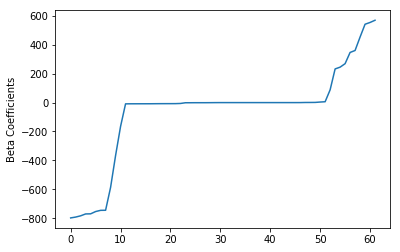

In [58]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

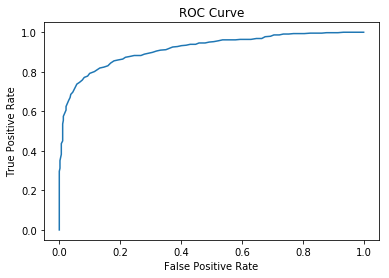

Area Under the Curve: 0.9153289321868946


In [59]:
training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

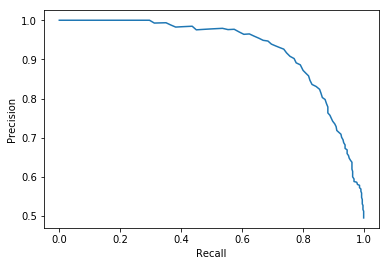

In [60]:
pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()